In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
(torch.Tensor((3, 4)).uniform_(0, 1) > 0.3).float()

tensor([1., 1.])

In [17]:
def dropout(X, drop_out):
    if drop_out == 1:
        return torch.zeros_like(X)
    elif drop_out == 0:
        return X
    else:
       mask = (torch.randn(size=X.shape) > drop_out).float()
       return X * mask / (1 - drop_out)

In [18]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))

In [19]:
X 

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])

In [20]:
dropout(X, 0.2)

tensor([[ 0.0000,  1.2500,  2.5000,  3.7500,  0.0000,  0.0000,  7.5000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 16.2500, 17.5000, 18.7500]])

In [23]:
dropout(X, 0)

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])

In [22]:
dropout(X, 0.2)

tensor([[0.0000, 1.2500, 0.0000, 3.7500, 0.0000, 6.2500, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [24]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [33]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                is_train=True):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(num_inputs, num_hiddens1)
        self.layer2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.layer3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
        self.is_train = is_train
        self.num_inputs = num_inputs
    
    def forward(self, X):
        H1 = self.relu(self.layer1(X.reshape(-1, self.num_inputs)))
        if self.is_train:
            H1 = dropout(H1, dropout1)
        H2 = self.relu(self.layer2(H1))
        if self.is_train:
            H2 = dropout(H2, dropout2)
        Output = self.layer3(H2)
        return Output

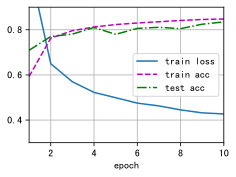

In [34]:
num_epochs, lr, batch_size = 10, 0.5, 256
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)
loss = nn.CrossEntropyLoss()
SGD = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, SGD)

## Pytorch简洁实现

In [39]:
net = nn.Sequential(nn.Flatten(),
                   nn.Linear(num_inputs, num_hiddens1),
                   nn.ReLU(),
                   nn.Dropout(),
                   nn.Linear(num_hiddens1, num_hiddens2),
                   nn.ReLU(),
                   nn.Dropout(),
                   nn.Linear(num_hiddens2, num_outputs)
                   )

def weight_init(model):
    if isinstance(model, nn.Linear):
        nn.init.normal_(model.weight, std=0.01)
        nn.init.constant_(model.bias, val=0)
net.apply(weight_init)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

In [40]:
SGD = torch.optim.SGD(net.parameters(), lr=lr)

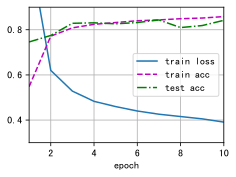

In [41]:
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, SGD)